In [186]:
import numpy as np
import pandas as pd
import sklearn as skl

df=pd.read_excel(r"injury_data_dirty.xlsx")
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Unnamed: 7
0,24,66.251933,175.732429,1,0.457929,5,0,NaN
1,37,70.996271,174.58165,0,0.226522,6,1,NaN
2,32,80.093781,186.329618,0,0.61397,2,1,NaN
3,28,87.473271,175.50424,one,0.252858,4,1,NaN
4,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,NaN
...,...,...,...,...,...,...,...,...
995,23,99.14791,165.290912,0,0.077857,3,1,NaN
996,23,75.799934,178.132281,1,0.955448,1,0,NaN
997,20,78.479061,173.823908,0,0.246961,1,1,NaN
998,24,66.915802,197.616889,1,0.859645,2,0,NaN


Check dei NaN

In [187]:
df.isna().sum()

Player_Age               11
Player_Weight             2
Player_Height             2
Previous_Injuries         6
Training_Intensity        2
Recovery_Time             2
Likelihood_of_Injury      2
Unnamed: 7              999
dtype: int64

check della colonna fantasma

In [188]:
df['Unnamed: 7'].value_counts()

Unnamed: 7
1.0    1
Name: count, dtype: int64

In [189]:
df['Unnamed: 7'].loc[lambda x: x==1.0].index

Index([832], dtype='int64')

In [190]:
df.loc[832]

Player_Age                     NaN
Player_Weight                   36
Player_Height            66.462635
Previous_Injuries       196.774629
Training_Intensity               0
Recovery_Time             0.131687
Likelihood_of_Injury             1
Unnamed: 7                     1.0
Name: 832, dtype: object

shift a sinistra della riga sbagliata di 1

In [191]:
for idx,i in enumerate(df.columns):
    if idx!=0:
        df.loc[832,df.columns[idx-1]]=df.loc[832,df.columns[idx]]

print(df.loc[832])


Player_Age                      36
Player_Weight            66.462635
Player_Height           196.774629
Previous_Injuries                0
Training_Intensity        0.131687
Recovery_Time                    1
Likelihood_of_Injury           1.0
Unnamed: 7                     1.0
Name: 832, dtype: object


drop colonna fantasma

In [192]:
df=df.drop(['Unnamed: 7'],axis=1 )
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.58165,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.61397,2,1
3,28,87.473271,175.50424,one,0.252858,4,1
4,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ
...,...,...,...,...,...,...,...
995,23,99.14791,165.290912,0,0.077857,3,1
996,23,75.799934,178.132281,1,0.955448,1,0
997,20,78.479061,173.823908,0,0.246961,1,1
998,24,66.915802,197.616889,1,0.859645,2,0


check e fixing dei valori di previous injuries

In [193]:
print(df.Previous_Injuries.value_counts())
df['Previous_Injuries'] = df['Previous_Injuries'].map({'one': 1, 'zero': 0,'ඞ': np.nan,'#':np.nan,1:1,0:0})
print(df.Previous_Injuries.value_counts())

Previous_Injuries
1       507
0       470
one       5
zero      5
#         4
ඞ         3
Name: count, dtype: int64
Previous_Injuries
1.0    512
0.0    475
Name: count, dtype: int64


In [194]:
df[~df.applymap(np.isreal).all(1)]

C:\Users\filip\AppData\Local\Temp\ipykernel_10948\358654104.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[~df.applymap(np.isreal).all(1)]


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
4,ඞ,ඞ,ඞ,NaN,ඞ,ඞ,ඞ
7,36',79.038206,181.523155,1.0,0.820696,3,1
81,32',63.928955,177.330853,1.0,0.677438,6,1
113,ඞ,ඞ,ඞ,NaN,ඞ,,ඞ
135,37',70.81857,157.230088,1.0,0.661719,6,0
199,21',76.338477,181.070424,0.0,0.034673,6,0
223,ඞ,ඞ,ඞ,NaN,ඞ,ඞ,ඞ
817,31,83.795926,196.953885,1.0,0.645725,4,zero
821,36,69.975375,163.764448,0.0,0.802396,6,zero
833,32',78.592094,175.075539,0.0,0.705041,3,0


Controllo quali valori non sono numerici

In [195]:
df[~df.applymap(np.isreal).all(1)]

C:\Users\filip\AppData\Local\Temp\ipykernel_10948\358654104.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[~df.applymap(np.isreal).all(1)]


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
4,ඞ,ඞ,ඞ,NaN,ඞ,ඞ,ඞ
7,36',79.038206,181.523155,1.0,0.820696,3,1
81,32',63.928955,177.330853,1.0,0.677438,6,1
113,ඞ,ඞ,ඞ,NaN,ඞ,,ඞ
135,37',70.81857,157.230088,1.0,0.661719,6,0
199,21',76.338477,181.070424,0.0,0.034673,6,0
223,ඞ,ඞ,ඞ,NaN,ඞ,ඞ,ඞ
817,31,83.795926,196.953885,1.0,0.645725,4,zero
821,36,69.975375,163.764448,0.0,0.802396,6,zero
833,32',78.592094,175.075539,0.0,0.705041,3,0


replacing dei valori numerici sbagliati con quelli corretti e di quello categorici con NaN

In [196]:
df=df.drop([113,4,223])  #replacing degli amoghi      

df[~df.map(np.isreal).all(1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
7,36',79.038206,181.523155,1.0,0.820696,3,1
81,32',63.928955,177.330853,1.0,0.677438,6,1
135,37',70.81857,157.230088,1.0,0.661719,6,0
199,21',76.338477,181.070424,0.0,0.034673,6,0
817,31,83.795926,196.953885,1.0,0.645725,4,zero
821,36,69.975375,163.764448,0.0,0.802396,6,zero
833,32',78.592094,175.075539,0.0,0.705041,3,0
982,32ì,57.371675,177.242978,1.0,0.29765,3,0
988,31',73.904507,178.060506,0.0,0.634907,6,0


replacing di player age

In [197]:
df['Player_Age'] = df['Player_Age'].map(lambda x: str(x)[:2])
df['Player_Age'] =pd.to_numeric(df['Player_Age'],errors='coerce')

In [198]:
df[~df.map(np.isreal).all(1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
817,31.0,83.795926,196.953885,1.0,0.645725,4,zero
821,36.0,69.975375,163.764448,0.0,0.802396,6,zero


In [199]:
df['Likelihood_of_Injury'] .value_counts()

Likelihood_of_Injury
0       496
1       496
zero      2
-1        1
Name: count, dtype: int64

fixing di likelihood of injury

In [200]:
df['Likelihood_of_Injury'] = df['Likelihood_of_Injury'].map({'one': 1, 'zero': 0,'ඞ': np.nan,'#':np.nan,1:1,0:0})
df[~df.map(np.isreal).all(1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury


In [201]:
df['Likelihood_of_Injury'] .value_counts()

Likelihood_of_Injury
0.0    498
1.0    496
Name: count, dtype: int64

check finale

In [202]:
for i in df.columns:
    print(df[i].unique()) 

[24. 37. 32. 28. 38. 36. 21. 25. 20. 39. 19. 29. 23. 18. 34. 27. 33. 22.
 26. 35. 31. 30. nan]
[66.251932862553 70.996271268324 80.093781163361 87.473270552317
 75.820548711528 70.126049760789 79.038205586793 64.086095627065
 66.829985607391 90.097713124596 79.020344800469 71.52473266227
 83.291386845853 87.869749638496 70.553624417544 70.725920575505
 69.47354226653 84.638503187154 84.735574475201 88.859033212911
 85.086029498488 58.677819205715 77.809643209182 64.416145971529
 69.870856250286 76.705942035809 83.355653983499 66.091566575489
 51.752803385476 76.805308418054 101.43571583399 72.971537803298
 75.469154349503 92.821636185361 80.902746190618 77.168610369829
 79.421166653135 77.502439325736 63.602455718433 61.585548422003
 93.868281121242 76.838833519052 76.000954425797 74.097723359438
 82.810732676165 100.38691101737 80.239526671078 69.119131736854
 73.665991421085 85.709964672053 69.17199398587 83.522464890303
 51.792626260219 72.701204285536 81.281400134807 87.70125546575

In [203]:
df_test=df.dropna()
df_test.corr()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
Player_Age,1.000000,-0.035692,0.051200,-0.058647,0.040619,-0.036998,0.006455
Player_Weight,-0.035692,1.000000,0.028161,0.037658,0.053309,-0.062332,-0.002278
Player_Height,0.051200,0.028161,1.000000,0.017073,0.047261,0.027347,0.031753
Previous_Injuries,-0.058647,0.037658,0.017073,1.000000,-0.023424,-0.011252,0.031783
Training_Intensity,0.040619,0.053309,0.047261,-0.023424,1.000000,-0.029051,0.091134
Recovery_Time,-0.036998,-0.062332,0.027347,-0.011252,-0.029051,1.000000,-0.013591
Likelihood_of_Injury,0.006455,-0.002278,0.031753,0.031783,0.091134,-0.013591,1.000000


In [204]:
df_test

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24.0,66.251933,175.732429,1.0,0.457929,5,0.0
1,37.0,70.996271,174.58165,0.0,0.226522,6,1.0
2,32.0,80.093781,186.329618,0.0,0.61397,2,1.0
3,28.0,87.473271,175.50424,1.0,0.252858,4,1.0
5,38.0,75.820549,206.631824,1.0,0.359209,4,0.0
...,...,...,...,...,...,...,...
995,23.0,99.14791,165.290912,0.0,0.077857,3,1.0
996,23.0,75.799934,178.132281,1.0,0.955448,1,0.0
997,20.0,78.479061,173.823908,0.0,0.246961,1,1.0
998,24.0,66.915802,197.616889,1.0,0.859645,2,0.0


In [205]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,0.285714,0.404293,0.490894,1.0,0.458945,0.8,0.0
1,0.904762,0.477897,0.472340,0.0,0.227009,1.0,1.0
2,0.666667,0.619035,0.661753,0.0,0.615343,0.2,1.0
3,0.476190,0.733520,0.487215,1.0,0.253406,0.6,1.0
4,0.952381,0.552740,0.989087,1.0,0.359999,0.6,0.0
...,...,...,...,...,...,...,...
992,0.238095,0.914639,0.322545,0.0,0.078004,0.4,1.0
993,0.238095,0.552420,0.529587,1.0,0.957602,0.0,0.0
994,0.095238,0.593984,0.460123,0.0,0.247495,0.0,1.0
995,0.285714,0.414593,0.843739,1.0,0.861580,0.2,0.0


In [206]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df_test[['Player_Age','Player_Weight','Player_Height','Previous_Injuries','Training_Intensity','Recovery_Time']]
#X = df_test[['Player_Age']]
y = df_test['Likelihood_of_Injury']

In [212]:
#fitting
model.fit(X, y)

LinearRegression()

In [213]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X)
r2 = r2_score(y,predictions)
rmse = mean_squared_error(y, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)


The r2 is:  0.01041014595654921
The rmse is:  0.4973903942861178


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


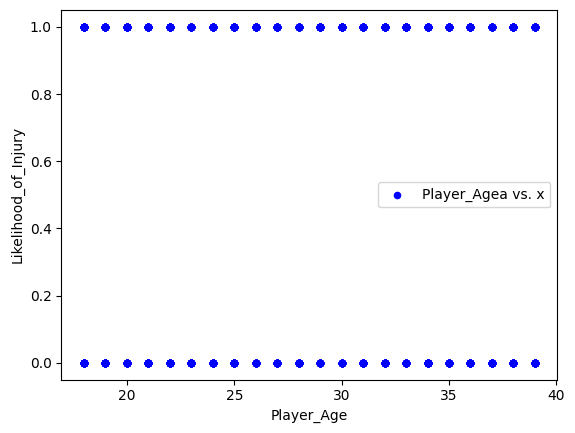

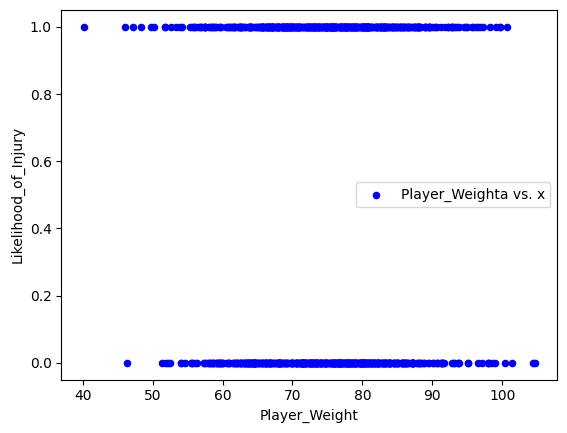

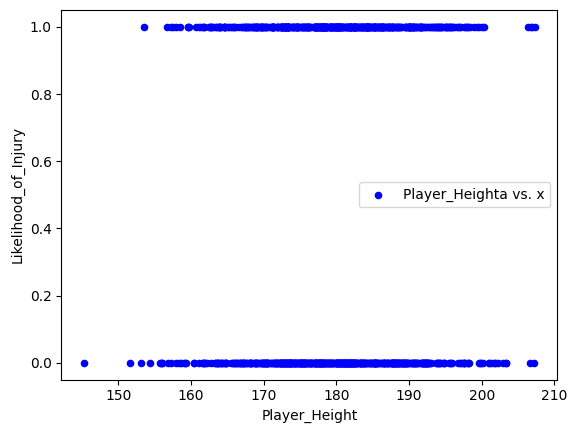

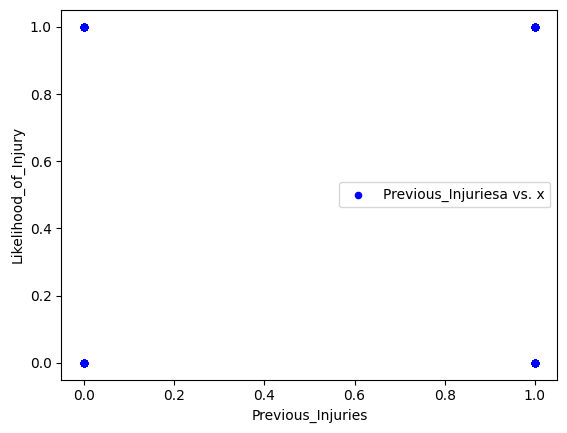

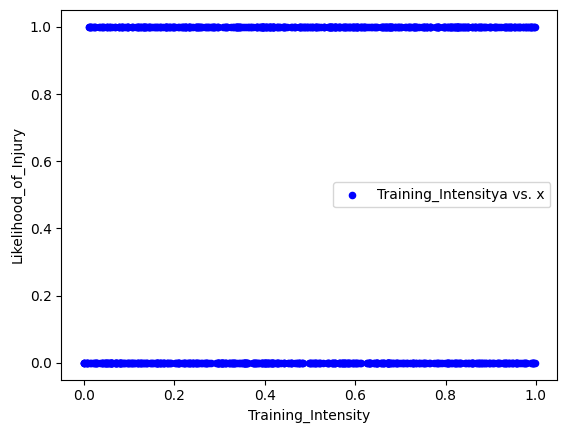

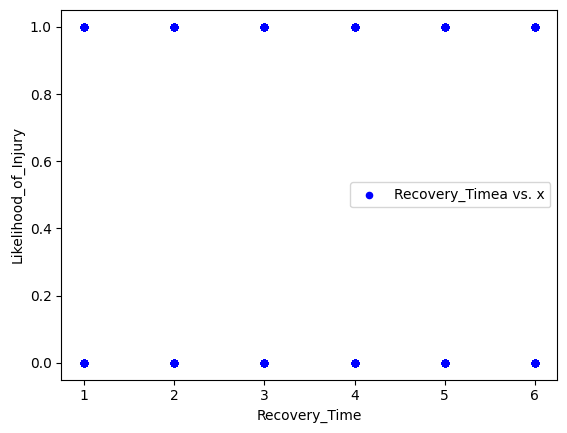

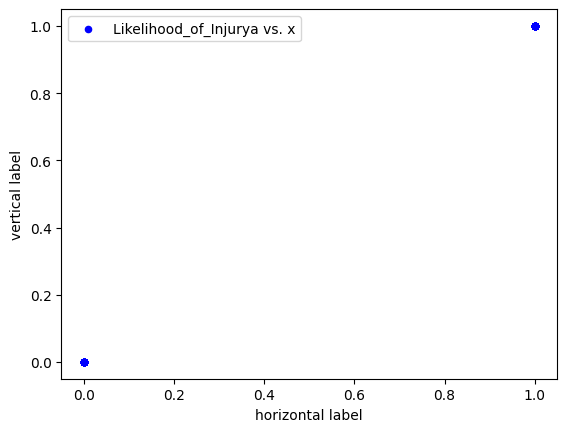

In [210]:
import matplotlib.pyplot as plt
for i in df.columns:
   ax = df.plot(kind="scatter", x=i,y='Likelihood_of_Injury', color="b", label=i+"a vs. x")

ax.set_xlabel("horizontal label")
ax.set_ylabel("vertical label")
plt.show()

[[ 28.61237785  67.45654015 171.49649696   0.50162866   0.45923023
    3.52442997   0.51140065]
 [ 26.92977528  84.20484019 178.2350455    0.52247191   0.50139386
    3.37359551   0.49438202]
 [ 29.30573248  71.21637981 189.61505429   0.52547771   0.50335362
    3.53821656   0.49363057]]


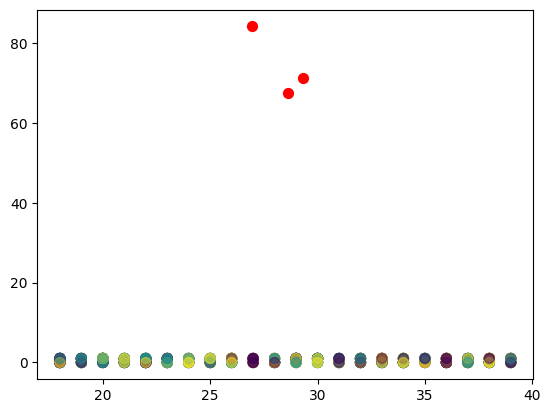

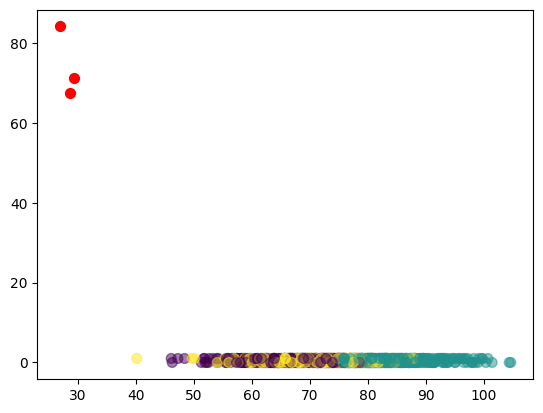

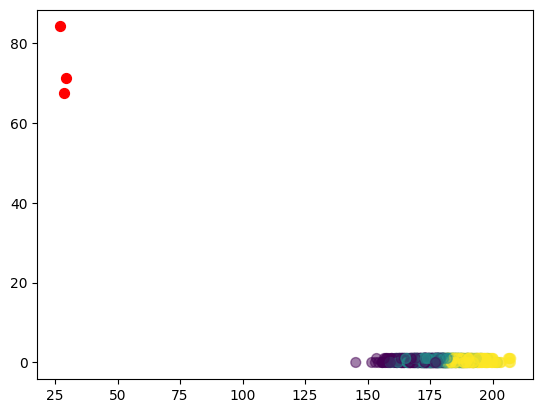

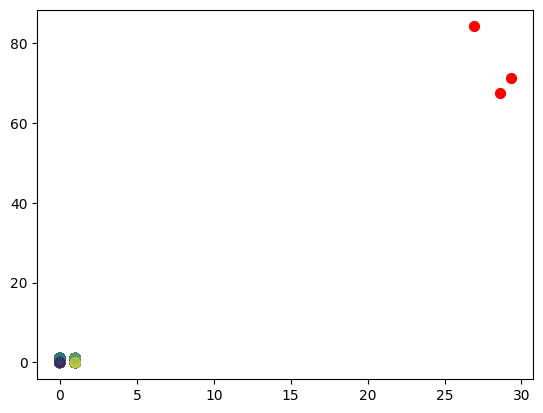

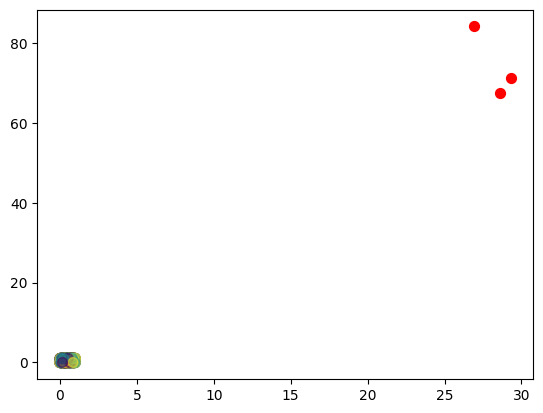

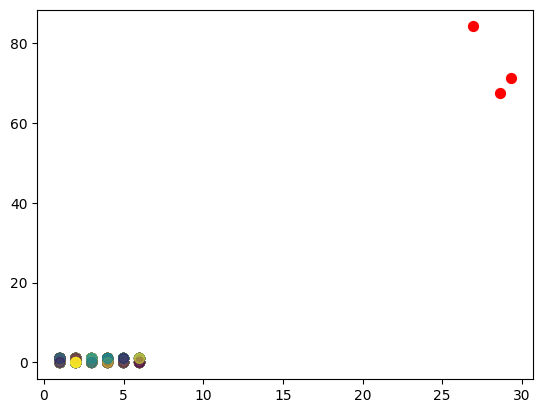

KeyError: 'Likelihood_of_Injury'

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=df.dropna()

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
df_x=df.drop(['Likelihood_of_Injury'],axis=1)
df_y=df['Likelihood_of_Injury']
for i in df.columns:
    plt.scatter(df_x[i],df_y, c=kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()


print(df['Likelihood_of_Injury'].value_counts())

In [ ]:
df['Likelihood_of_Injury'].value_counts()

Likelihood_of_Injury
0.0    489
1.0    488
Name: count, dtype: int64